In [1]:
# Load libraries

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Choose seaborn styles

sns.set()
sns.set_theme(style='ticks')
sns.set_palette("muted")

In [3]:
# go to data directory
os.chdir('C:\\Users\\rgarcia\\Documents\\data')

In [4]:
# Downloads zip file, extracts desired csv and deletes zip

# dataset_url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2018.zip'
# user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/600.1.17 (KHTML, like Gecko) Version/8.0 Safari/600.1.17'

# os.system(f'wget --header="User-Agent: {user_agent}" {dataset_url}')
# os.system(f'unzip -p {dataset_url.split('/')[-1]} {file_to_extract} > {file_to_extract}')
# os.remove(dataset_url.split('/')[-1])

# Abre o dataset  com os votos

In [5]:
file_to_extract = 'votacao_candidato_munzona_2018_BRASIL.csv'

In [6]:
# Dataset takes 1m45s minute to load in my lame PC

df = pd.read_csv(file_to_extract, sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

In [7]:
#Filtra para ter só dados de governador primeiro turno

df = df.query('NR_TURNO == 1')
df = df.query('DS_CARGO == "Governador"')

# Escolha o estado para a análise:

In [8]:
# Escolha o estado

chosen_uf = input('Digite a sigla do estado: ').upper()
df = df.query(f'SG_UF == "{chosen_uf}"')

Digite a sigla do estado: sp


In [9]:
#Resultado do primeiro turno
resultado = df.groupby('NM_URNA_CANDIDATO').QT_VOTOS_NOMINAIS.sum().reset_index().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)
resultado

,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
0,JOÃO DORIA,6431555
3,MARCIO FRANÇA,4358998
4,PAULO SKAF,4269865
1,LUIZ MARINHO,2563922
2,MAJOR COSTA E SILVA,747462
8,ROGERIO CHEQUER,673102
7,RODRIGO TAVARES,649729
6,PROFESSORA LISETE,507236
5,PROF. CLAUDIO FERNANDO,28666
9,TONINHO FERREIRA,16202


In [10]:
# Lista de quem passou ao segundo turno
segundo_turno = resultado[:2].NM_URNA_CANDIDATO.to_list()
segundo_turno

['JOÃO DORIA', 'MARCIO FRANÇA']

In [11]:
# lista de quem foi eliminado
eliminados = [i for i in resultado.NM_URNA_CANDIDATO.to_list() if i not in segundo_turno]
eliminados

['PAULO SKAF',
 'LUIZ MARINHO',
 'MAJOR COSTA E SILVA',
 'ROGERIO CHEQUER',
 'RODRIGO TAVARES',
 'PROFESSORA LISETE',
 'PROF. CLAUDIO FERNANDO',
 'TONINHO FERREIRA']

In [12]:
# encolhe dataframe para colunas necessárias
df = df[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'QT_VOTOS_NOMINAIS']]

In [13]:
# Agrupa por municipio e candidato
agrupa = df.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NM_URNA_CANDIDATO']).QT_VOTOS_NOMINAIS.sum()
agrupa = agrupa.reset_index()
agrupa.sample(n=5)

,CD_MUNICIPIO,NM_MUNICIPIO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
4688,69310,PRESIDENTE VENCESLAU,MAJOR COSTA E SILVA,298
6029,72079,TURMALINA,PAULO SKAF,314
3276,66370,LENÇÓIS PAULISTA,ROGERIO CHEQUER,613
2417,64610,GUARANI D OESTE,MARCIO FRANÇA,288
5587,71153,SÃO SEBASTIÃO,ROGERIO CHEQUER,909


In [14]:
# Pivota por index municipio coluna candidato e valor vot
pivota = agrupa.pivot(index=(['CD_MUNICIPIO', 'NM_MUNICIPIO']), 
                      columns='NM_URNA_CANDIDATO', 
                      values='QT_VOTOS_NOMINAIS').reset_index()

In [15]:
# Corrige bug que muda votos de int para float

# select numeric columns
numeric_columns = pivota.select_dtypes(include=['number']).columns
# fill 0 to all NaN 
pivota[numeric_columns] = pivota[numeric_columns].fillna(0)
# convert all floats to ints
m = pivota.select_dtypes(np.number)
pivota[m.columns]= m.round().astype('Int64')

In [16]:
# converts column name to match other dataframes
pivota.rename(columns={'CD_MUNICIPIO':'codigo_tse'}, inplace=True)

In [17]:
pivota

NM_URNA_CANDIDATO,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA
0,61000,EUCLIDES DA CUNHA PAULISTA,1174,1710,50,677,533,4,10,75,24,2
1,61018,ADAMANTINA,6371,906,694,4487,3183,6,134,383,246,5
2,61026,BOREBI,489,222,60,266,426,1,13,31,12,0
3,61034,ADOLFO,830,213,101,497,600,1,16,71,24,0
4,61042,TARUMÃ,2804,540,271,2417,883,3,50,143,71,5
...,...,...,...,...,...,...,...,...,...,...,...,...
640,72397,VIRADOURO,3013,674,409,1710,1594,4,86,298,106,2
641,72419,VISTA ALEGRE DO ALTO,1361,426,147,623,406,4,51,82,63,1
642,72435,VOTORANTIM,20056,7455,3460,7409,10067,68,1840,2912,1560,31
643,72451,VOTUPORANGA,16704,3005,1565,6924,11908,35,449,1055,794,9


In [18]:
# Retrives dataset for absent voters and null or blank votes
df2 = pd.read_csv('detalhe_votacao_munzona_2018_BRASIL.csv', sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

# Filtra estado, governador e primeiro turno
df2 = df2.query(f'SG_UF == "{chosen_uf}"')
df2 = df2.query(f'NR_TURNO == 1')
df2 = df2.query(f'DS_CARGO == "Governador"')

# Filtra colunas para manter só branco, nulo e abstenções
df2 = df2[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']]

# agrupa por municipio
df2 = df2.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO'])['QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS'].sum().reset_index()

df2.columns = ['codigo_tse', 'NM_MUNICIPIO', 'QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_17776\1044683636.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO'])['QT_ABSTENCOES', 'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS'].sum().reset_index()


In [19]:
resultado_municipios = pivota.merge(df2.drop(columns='NM_MUNICIPIO'), how='left', on='codigo_tse')

In [20]:
# IBGE to TSE conversion table
ibge_tse_table = 'https://github.com/betafcc/Municipios-Brasileiros-TSE/raw/master/municipios_brasileiros_tse.csv'

ibge = pd.read_csv(ibge_tse_table)

ibge = ibge[['codigo_tse', 'codigo_ibge']]

In [21]:
resultado_municipios = resultado_municipios.merge(ibge, how='left', on='codigo_tse')

In [22]:
resultado_municipios.sample(n=5)

,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA,QT_ABSTENCOES,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,codigo_ibge
242,64416,GETULINA,1543,420,102,1185,990,5,22,87,30,3,2712,482,758,3517000
276,65099,ILHABELA,4996,986,447,4485,2560,18,399,399,395,10,6418,1175,2029,3520400
219,63959,ECHAPORÃ,1115,354,91,804,688,1,17,64,49,0,1344,209,547,3514700
451,68594,PILAR DO SUL,7451,1083,395,1797,2341,5,113,312,188,2,4613,1318,2035,3537909
86,61867,MARAPOAMA,645,84,114,544,207,0,14,48,37,0,572,120,268,3528858


In [23]:
resultado_municipios['VENCEDOR'] = resultado_municipios[segundo_turno + eliminados].idxmax(axis=1).str.title()

In [24]:
resultado_municipios['PCT_BRANCOS_NULOS'] = (resultado_municipios[['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']].sum(axis=1)/ \
resultado_municipios[segundo_turno + eliminados + ['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS']].sum(axis=1) *100).round(1)

In [25]:
resultado_municipios

,codigo_tse,NM_MUNICIPIO,JOÃO DORIA,LUIZ MARINHO,MAJOR COSTA E SILVA,MARCIO FRANÇA,PAULO SKAF,PROF. CLAUDIO FERNANDO,PROFESSORA LISETE,RODRIGO TAVARES,ROGERIO CHEQUER,TONINHO FERREIRA,QT_ABSTENCOES,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,codigo_ibge,VENCEDOR,PCT_BRANCOS_NULOS
0,61000,EUCLIDES DA CUNHA PAULISTA,1174,1710,50,677,533,4,10,75,24,2,2573,234,560,3515350,Luiz Marinho,15.7
1,61018,ADAMANTINA,6371,906,694,4487,3183,6,134,383,246,5,7107,1685,2491,3500105,João Doria,20.3
2,61026,BOREBI,489,222,60,266,426,1,13,31,12,0,442,92,152,3507456,João Doria,13.8
3,61034,ADOLFO,830,213,101,497,600,1,16,71,24,0,1154,225,461,3500204,João Doria,22.6
4,61042,TARUMÃ,2804,540,271,2417,883,3,50,143,71,5,2360,558,1080,3553955,João Doria,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,72397,VIRADOURO,3013,674,409,1710,1594,4,86,298,106,2,1631,922,1580,3556800,João Doria,24.1
641,72419,VISTA ALEGRE DO ALTO,1361,426,147,623,406,4,51,82,63,1,1233,417,655,3556909,João Doria,25.3
642,72435,VOTORANTIM,20056,7455,3460,7409,10067,68,1840,2912,1560,31,10696,5126,11310,3557006,João Doria,23.1
643,72451,VOTUPORANGA,16704,3005,1565,6924,11908,35,449,1055,794,9,17186,3146,6821,3557105,João Doria,19.0


In [26]:
resultado_municipios['PCT_ABSTENCOES'] = (resultado_municipios['QT_ABSTENCOES']/ \
resultado_municipios[segundo_turno + eliminados + ['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS', 'QT_ABSTENCOES']].sum(axis=1) *100).round(1)

In [27]:
resultado_municipios['ELEITORADO'] = resultado_municipios[segundo_turno + eliminados + ['QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS', 'QT_ABSTENCOES']].sum(axis=1).astype(int)

In [28]:
resultado_municipios['codigo_ibge'] = resultado_municipios['codigo_ibge'].astype(str)

In [29]:
# Opens Brazilian municipalities map
# https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=acesso-ao-produto

In [37]:
mun = gpd.read_file(r'BR_Municipios_2021_very_low_res.json') # runs in 5 seconds

In [38]:
mun = mun.rename(columns={'CD_MUN':'codigo_ibge'})

In [39]:
mun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   codigo_ibge  5572 non-null   object  
 1   NM_MUN       5572 non-null   object  
 2   SIGLA        5572 non-null   object  
 3   AREA_KM2     5572 non-null   float64 
 4   geometry     5572 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 217.8+ KB


In [42]:
# Extracts state map from national map
mun = mun[mun['SIGLA'] == chosen_uf]

<AxesSubplot:>

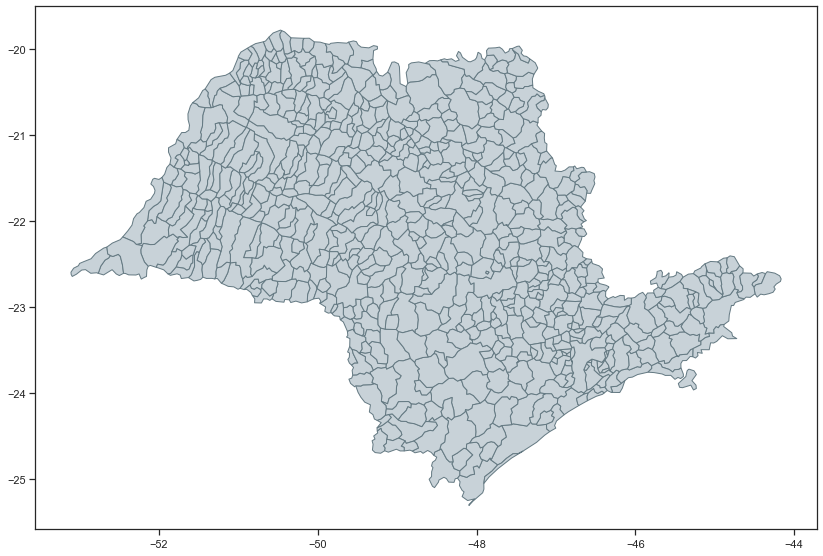

In [43]:
# Checks if map has loaded correctly
mun.plot(edgecolor='#657A83', facecolor='#C8D2D8', linewidth=1, figsize=(14,12))

In [44]:
to_merge = resultado_municipios.drop(columns=['NM_MUNICIPIO', 'codigo_tse'])[segundo_turno + eliminados + ['QT_ABSTENCOES',
       'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS', 'codigo_ibge', 'VENCEDOR',
       'PCT_BRANCOS_NULOS', 'PCT_ABSTENCOES', 'ELEITORADO']]

In [45]:
mun['centroid'] = mun.geometry.centroid

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_17776\3582613145.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mun['centroid'] = mun.geometry.centroid


In [46]:
mun['longitude'] = mun.centroid.x
mun['latitude'] = mun.centroid.y

C:\Users\rgarcia\AppData\Local\Temp\ipykernel_17776\2982142036.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mun['longitude'] = mun.centroid.x
C:\Users\rgarcia\AppData\Local\Temp\ipykernel_17776\2982142036.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mun['latitude'] = mun.centroid.y


In [50]:
mun = mun.rename(columns={'NM_MUN':'Município', 'SIGLA':'UF'})

In [52]:
resultado_municipios = mun.merge(to_merge)

In [55]:
resultado_municipios = resultado_municipios.drop(columns='AREA_KM2')

In [56]:
candidatos = segundo_turno+eliminados

In [57]:
resultado_municipios.columns = [i.title() if i in candidatos else i.lower() for i in resultado_municipios.columns]

In [58]:
resultado_municipios

,codigo_ibge,município,uf,geometry,centroid,longitude,latitude,João Doria,Marcio França,Paulo Skaf,...,Professora Lisete,Prof. Claudio Fernando,Toninho Ferreira,qt_abstencoes,qt_votos_brancos,qt_votos_nulos,vencedor,pct_brancos_nulos,pct_abstencoes,eleitorado
0,3500105,Adamantina,SP,"POLYGON ((-50.99301 -21.43711, -51.05876 -21.3...",POINT (-51.05690 -21.57417),-51.056899,-21.574175,6371,4487,3183,...,134,6,5,7107,1685,2491,João Doria,20.3,25.7,27698
1,3500204,Adolfo,SP,"POLYGON ((-49.57243 -21.27111, -49.61249 -21.2...",POINT (-49.65775 -21.29091),-49.657752,-21.290907,830,497,600,...,16,1,0,1154,225,461,João Doria,22.6,27.5,4193
2,3500303,Aguaí,SP,"POLYGON ((-46.93973 -21.97809, -46.98216 -21.9...",POINT (-47.03971 -22.04849),-47.039706,-22.048491,4696,2215,3026,...,150,33,8,4634,1656,2946,João Doria,26.0,20.8,22324
3,3500402,Águas da Prata,SP,"POLYGON ((-46.69071 -21.83763, -46.72104 -21.8...",POINT (-46.69361 -21.91171),-46.693609,-21.911710,1427,799,771,...,55,7,3,1583,356,626,João Doria,20.5,24.8,6383
4,3500501,Águas de Lindóia,SP,"POLYGON ((-46.54986 -22.46955, -46.55481 -22.4...",POINT (-46.60290 -22.47408),-46.602903,-22.474080,3581,2176,1399,...,109,16,5,3350,631,1633,João Doria,20.4,23.2,14437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3557006,Votorantim,SP,"POLYGON ((-47.30746 -23.56101, -47.35432 -23.5...",POINT (-47.39896 -23.58027),-47.398959,-23.580266,20056,7409,10067,...,1840,68,31,10696,5126,11310,João Doria,23.1,13.0,81990
641,3557105,Votuporanga,SP,"POLYGON ((-50.00751 -20.33182, -50.05323 -20.3...",POINT (-49.98927 -20.46001),-49.989266,-20.460006,16704,6924,11908,...,449,35,9,17186,3146,6821,João Doria,19.0,24.7,69601
642,3557154,Zacarias,SP,"POLYGON ((-49.96007 -21.13312, -49.98482 -21.0...",POINT (-50.04824 -21.12467),-50.048235,-21.124673,569,225,342,...,7,1,2,621,97,305,João Doria,22.0,25.3,2451
643,3557204,Chavantes,SP,"POLYGON ((-49.67729 -23.00875, -49.68644 -22.9...",POINT (-49.72725 -23.05003),-49.727250,-23.050029,1835,1719,1223,...,65,5,6,852,530,918,João Doria,20.0,10.5,8096


In [59]:
eliminados_t = [i.title() for i in eliminados]

In [60]:
segundo_turno_t = [i.title() for i in segundo_turno]

In [61]:
resultado_municipios['votos_perdedores'] = resultado_municipios[eliminados_t].sum(axis=1).astype(int)

In [62]:
resultado_municipios['pct_votos_perdedores'] = (resultado_municipios[eliminados_t].sum(axis=1)/resultado_municipios[segundo_turno_t + eliminados_t].sum(axis=1)*100).round(1)

In [63]:
resultado_municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 645 entries, 0 to 644
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   codigo_ibge             645 non-null    object  
 1   município               645 non-null    object  
 2   uf                      645 non-null    object  
 3   geometry                645 non-null    geometry
 4   centroid                645 non-null    geometry
 5   longitude               645 non-null    float64 
 6   latitude                645 non-null    float64 
 7   João Doria              645 non-null    Int64   
 8   Marcio França           645 non-null    Int64   
 9   Paulo Skaf              645 non-null    Int64   
 10  Luiz Marinho            645 non-null    Int64   
 11  Major Costa E Silva     645 non-null    Int64   
 12  Rogerio Chequer         645 non-null    Int64   
 13  Rodrigo Tavares         645 non-null    Int64   
 14  Professora Lisete 

# Candidatos vencedores por município

In [64]:
list(resultado_municipios.vencedor.unique())

['João Doria', 'Paulo Skaf', 'Marcio França', 'Luiz Marinho']

<AxesSubplot:>

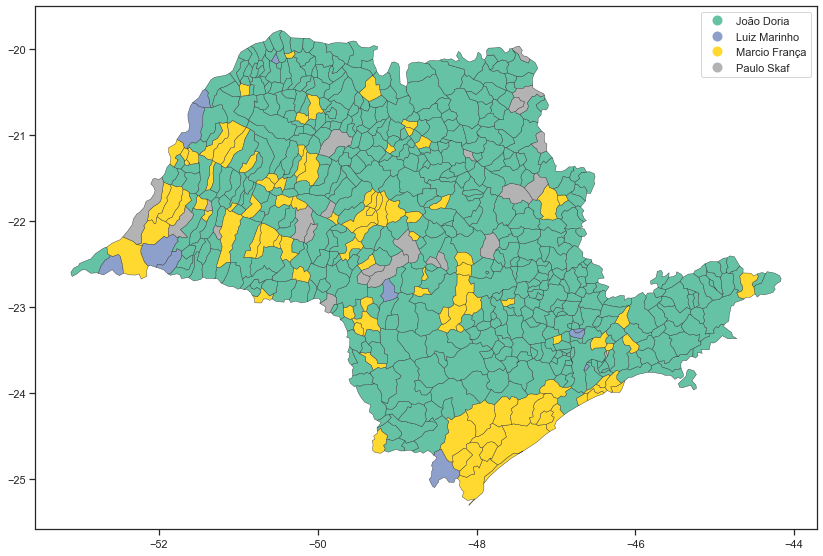

In [65]:
resultado_municipios.plot(column='vencedor', cmap='Set2', categorical=True, figsize=(14,12),
                                     legend=True, edgecolor='#333333', linewidth=0.4)

### **Mapa para referência:** [Clique aqui](http://www.sp-turismo.com/municipios-sp.htm)

# Votos em candidatos que não passaram ao 2º turno
**OBS:** (% dos votos válidos)

<AxesSubplot:>

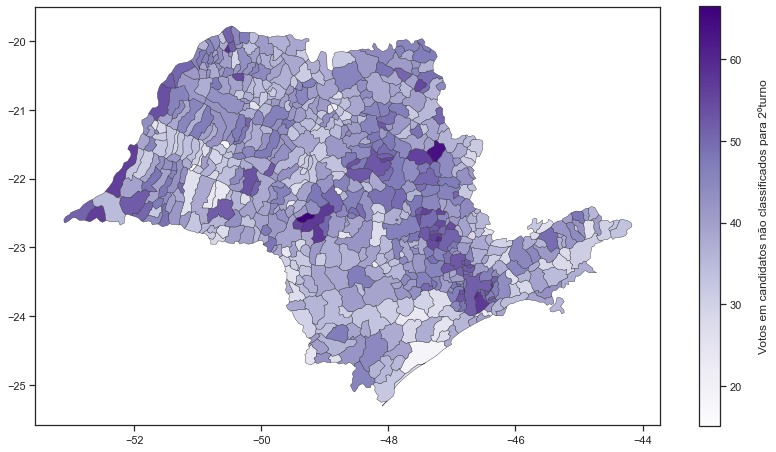

In [66]:
resultado_municipios.plot(column='pct_votos_perdedores', figsize=(14,12), cmap='Purples',
                   edgecolor='#333333', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label': "\nVotos em candidatos não classificados para 2ºturno"})

# Porcentagem de brancos e nulos
**OBS:** (% do eleitorado total, incluindo abstenções)

<AxesSubplot:>

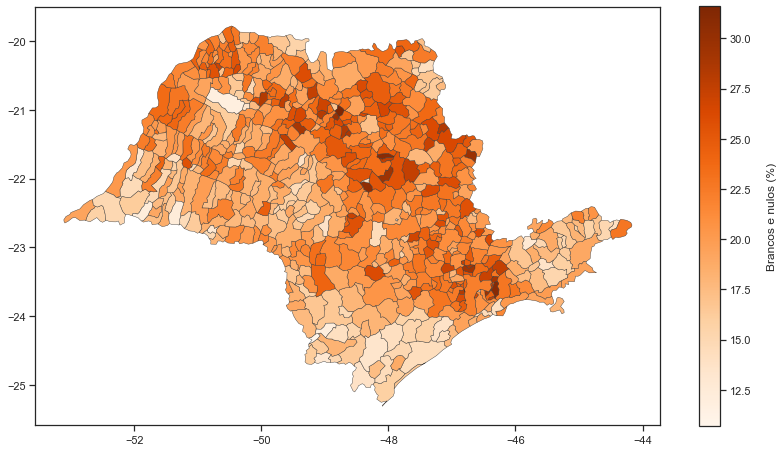

In [67]:
resultado_municipios.plot(column='pct_brancos_nulos', figsize=(14,12), cmap='Oranges', 
                   edgecolor='#333333', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label':'\nBrancos e nulos (%)'})

# Porcentagem de abstenções

<AxesSubplot:>

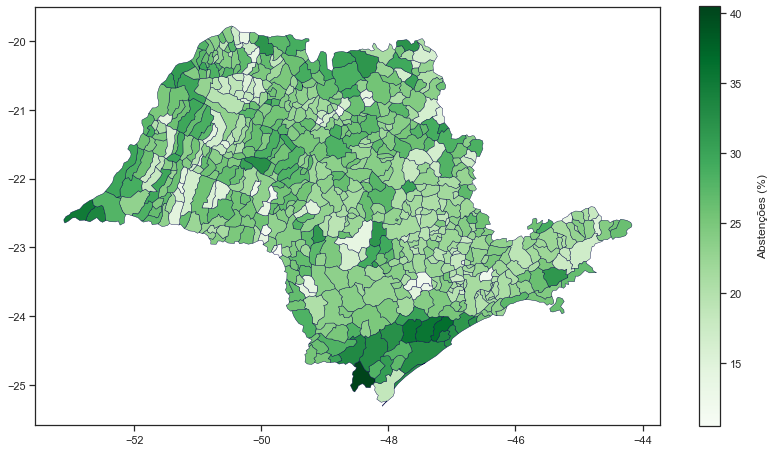

In [68]:
resultado_municipios.plot(column='pct_abstencoes', figsize=(14,12), cmap='Greens',
                   edgecolor='#000044', linewidth=0.4, legend=True, legend_kwds={'shrink': 0.643, 'label':'\nAbstenções (%)'})

# Tamanho do eleitorado em cada município
**OBS**: Proporção em relação à capital

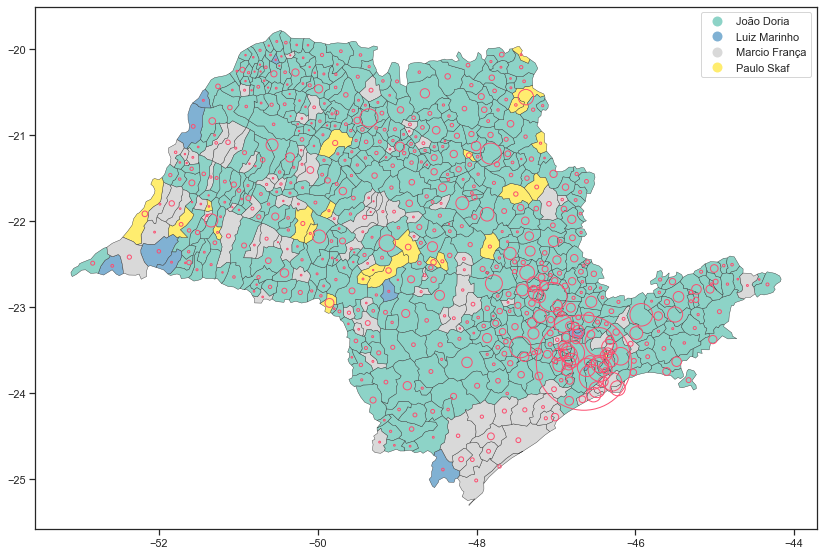

In [69]:
votantes = resultado_municipios.set_geometry("centroid").\
plot(ax=resultado_municipios.plot(column='vencedor', cmap='Set3', categorical=True, figsize=(14,12),
                                     legend=True, edgecolor='#333333', linewidth=0.4), 
     markersize=resultado_municipios['eleitorado']/1000, color='#fc4f7100', edgecolors='#fc4f71ff',
     figsize=(40,40), legend=True, zorder=1)

In [71]:
resultado_municipios.query('eleitorado > 250000').sort_values(by='eleitorado', ascending=False)

,codigo_ibge,município,uf,geometry,centroid,longitude,latitude,João Doria,Marcio França,Paulo Skaf,...,Toninho Ferreira,qt_abstencoes,qt_votos_brancos,qt_votos_nulos,vencedor,pct_brancos_nulos,pct_abstencoes,eleitorado,votos_perdedores,pct_votos_perdedores
562,3550308,São Paulo,SP,"POLYGON ((-46.53544 -23.36330, -46.60023 -23.3...",POINT (-46.64951 -23.64635),-46.649507,-23.646353,1460836,1229116,1220740,...,5104,1917319,451850,1134778,João Doria,22.2,21.2,9050681,2856782,51.5
108,3509502,Campinas,SP,"POLYGON ((-46.85839 -22.83618, -46.89080 -22.8...",POINT (-47.04532 -22.88230),-47.045318,-22.882298,165170,90612,99800,...,454,188535,44076,95583,João Doria,21.1,22.2,849183,265207,50.9
212,3518800,Guarulhos,SP,"POLYGON ((-46.33654 -23.33476, -46.35814 -23.3...",POINT (-46.45475 -23.40473),-46.454754,-23.404735,139125,139315,91435,...,409,98777,51026,143293,Marcio França,27.2,12.1,814371,242835,46.6
544,3548708,São Bernardo do Campo,SP,"POLYGON ((-46.55391 -23.64743, -46.60806 -23.6...",POINT (-46.55044 -23.81369),-46.550440,-23.813692,111307,57680,71415,...,338,123266,27704,75871,João Doria,20.8,19.9,620862,225034,57.1
534,3547809,Santo André,SP,"POLYGON ((-46.48545 -23.62298, -46.54804 -23.6...",POINT (-46.44620 -23.72503),-46.446199,-23.725027,112911,59681,73273,...,279,121770,25194,70925,João Doria,21.3,21.3,572955,182474,51.4
387,3534401,Osasco,SP,"POLYGON ((-46.80777 -23.60907, -46.77306 -23.5...",POINT (-46.79154 -23.53314),-46.791538,-23.533140,106076,69551,67245,...,336,119113,32966,76149,João Doria,24.2,20.9,569445,165590,48.5
557,3549904,São José dos Campos,SP,"POLYGON ((-45.87098 -22.87149, -45.90903 -22.8...",POINT (-45.92735 -23.08920),-45.927350,-23.089197,133799,55926,54667,...,1716,96530,22519,46472,João Doria,16.7,19.0,508499,153253,44.7
581,3552205,Sorocaba,SP,"POLYGON ((-47.41817 -23.35773, -47.50440 -23.3...",POINT (-47.44969 -23.46575),-47.449695,-23.465749,120356,47948,63002,...,199,56197,24920,64072,João Doria,22.1,12.2,458763,145270,46.3
487,3543402,Ribeirão Preto,SP,"POLYGON ((-47.71905 -21.12007, -47.75097 -21.1...",POINT (-47.82152 -21.21367),-47.821518,-21.213669,99663,53513,45611,...,186,105650,22596,53587,João Doria,22.6,23.8,443220,108211,41.4
542,3548500,Santos,SP,"POLYGON ((-46.20237 -23.75130, -46.23963 -23.7...",POINT (-46.28946 -23.86880),-46.289456,-23.868803,60781,84326,33209,...,111,80764,11421,25587,Marcio França,14.1,23.5,343707,80828,35.8
